# Basic Plots
Here we will try to plot following basic plots using plotly.  
 - Line
 - Pie
 - Bar
 - Histogram
 - Inset
 - Box
 - Scatter

### Lets load some data first

In [1]:
import pandas as pd
tourism = pd.read_csv('datasets/europe_tourism.csv')
tourism.head()

,Year,Western,Eastern,Southern
0,1990,108.6,33.9,90.3
1,1995,112.2,58.9,96.0
2,2000,139.7,69.6,132.6
3,2005,141.7,95.3,156.4
4,2010,154.4,98.5,173.3


In [2]:
## Import offline modile for offline graph
import plotly.offline as offline
## Import Plotly graph Object
import plotly.graph_objs as go

## Set plotly inline mode
offline.init_notebook_mode(connected=True)

## Line Chart

#### 1. We will create data traces

In [3]:
## This is first trace for data which will be line for Western 
trace_western = go.Scatter(
    x = tourism['Year'],
    y = tourism['Western'],
    name = 'Western Europe',
    line = {'color': 'rgb(0, 250, 24)', 'width': 4}
)

In [4]:
## This is second trace for data which will be dotted line for Eastern 
trace_eastern = go.Scatter(
    x = tourism['Year'],
    y = tourism['Eastern'],
    name = 'Eastern Europe',
    line = {'color': 'rgb(205, 12, 24)', 'width': 4, 'dash': 'dot'}
)

In [5]:
## This is third trace for data which will be dashed line for Southern 
trace_southern = go.Scatter(
    x = tourism['Year'],
    y = tourism['Southern'],
    name = 'Southern Europe',
    line = {'color': 'rgb(2, 12, 240)', 'width': 4, 'dash': 'dash'}
)

#### 2. We will create data Object

In [6]:
data = [trace_western, trace_eastern, trace_southern]

#### 3. We will create layout object

In [7]:
layout = {
    'title': 'International Tourism Arrival in Europe',
    'xaxis': {'title': 'Year'},
    'yaxis': {'title': 'Tourism (in millions)'}
}

#### 4. Create figure object

In [8]:
fig = {
    'data': data,
    'layout': layout,
}
offline.iplot(fig)

### We can add annotations to the plot using Annotations property of Layout object

In [9]:
# Empty list of annotations
annotations = []

## Add annotation for first point on wester line
annotations.append({
    'x': tourism['Year'][0],
    'y': tourism['Western'][0],
    'xanchor': 'right',
    'yanchor': 'middle',
    'text': str(tourism['Western'][0]) + ' M',
    'showarrow': False,
})

## Add annotation for last point on Eastern Line
annotations.append({
    'x': tourism['Year'][5],
    'y': tourism['Eastern'][5],
    'xanchor': 'left',
    'yanchor': 'bottom',
    'text': str(tourism['Eastern'][5]) + ' M',
    'showarrow': True,
    'arrowcolor': 'gray'
})

#### Add annotations to layout and show plot

In [10]:
layout['annotations'] = annotations

offline.iplot(fig)

## Pie Chart

### Lets first prepare the data for Pie chart

In [11]:
continents = ['Asia', 'Africa', 'America', 'Europe', 'Oceania']
population = [4436, 1216, 1024, 739, 423]

### We can plot pie chart using go.Pie. And We will simpy use data and let plotly figure out layout and fig object

In [12]:
pie = go.Pie(labels=continents, values=population)
data = [pie]
offline.iplot(data)

In [13]:
## Se can set some more options in Pie chart
pie = go.Pie(
    labels=continents, 
    values=population,
    hoverinfo='label+value',
    hole=0.4
)
data = [pie]
offline.iplot(data)

## Bar Chart

### Lets prepare data for Bar chart

In [14]:
continents = ['Asia', 'Africa', 'America', 'Europe', 'Oceania']
population = [4436, 1216, 1024, 739, 423]
area = [446, 303, 420, 100, 85]

In [15]:
bar = go.Bar(x=continents, y=population)
data = [bar]
offline.iplot(data)

We can also add 2 bars which will be 2 traces

In [16]:
bar1 = go.Bar(x=continents, y=population, name='Population')
bar2 = go.Bar(x=continents, y=area, name='Area')
data = [bar1, bar2]
offline.iplot(data)

By Default Bar plot with multiple traces is group plot.

In [17]:
bar1 = go.Bar(x=continents, y=population, name='Population')
bar2 = go.Bar(x=continents, y=area, name='Area')
data = [bar1, bar2]
layout = go.Layout(barmode='group')
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

If we want stacked plot, we can specify in layout.

In [18]:
bar1 = go.Bar(x=continents, y=population, name='Population')
bar2 = go.Bar(x=continents, y=area, name='Area')
data = [bar1, bar2]
layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

## Histograms

#### Lets prepare some data for histogram

In [19]:
import numpy as np
rand_num = np.random.randn(200)

In [20]:
hist = go.Histogram(x=rand_num)
data = [hist]
offline.iplot(data)

##### By defaulat histogram shows counts. If we want to see probability densitym

In [21]:
hist = go.Histogram(x=rand_num, histnorm='probability')
data = [hist]
offline.iplot(data)

##### We can show another histogram in same plot

In [22]:
rand_num2 = np.random.randn(100) + 1

In [23]:
hist1 = go.Histogram(x=rand_num, name='Series 1', opacity=0.9)
hist2 = go.Histogram(x=rand_num2, name='Series 2', opacity=0.5)
data = [hist1, hist2]
offline.iplot(data)

This still shows grouped bars by default, to see actual overlapping histograms

In [24]:
hist1 = go.Histogram(x=rand_num, name='Series 1', opacity=0.9)
hist2 = go.Histogram(x=rand_num2, name='Series 2', opacity=0.5)
data = [hist1, hist2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

## Inset

#### Inset plots are plots which are embedded in another plots

##### Lets prepare some data

In [25]:
planet = pd.read_csv('datasets/planets.csv')
planet.head()

,planet,no_of_moons,distance_from_sun,period_of_revolution_around_sun,planet_diameter
0,Mercury,0,57.9,87.96,4879
1,Venus,0,108.2,224.68,12104
2,Earth,1,149.6,365.26,12756
3,Mars,2,227.9,686.98,6792
4,Jupiter,67,778.6,4332.70,142984


First Trace

In [26]:
trace0 = go.Bar(x=planet.planet, y=planet.distance_from_sun, name='Distance From Sun')

Second trace with custom X and Y axis

In [27]:
trace1 = go.Bar(x=planet.planet, y=planet.period_of_revolution_around_sun, xaxis='x2', yaxis='y2', name='Period of Revolution')

Data Object

In [28]:
data = [trace0, trace1]

##### Now create a layout which will provide anchor for inset

In [29]:
### 2nd X Axis goes from 20% - 50% of original X Axis
### 2nd Y Axis goes from 60% - 90% of original Y Axis
layout = go.Layout(
    xaxis2=go.layout.XAxis(domain=[0.2, 0.5], anchor='y2'),
    yaxis2=go.layout.YAxis(domain=[0.6, 0.9], anchor='x2')
)

Now create figure

In [30]:
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

### Inset can also be used to Show graphs side by side

In [31]:
### Original X Axis goes from 0% - 45%
### 2nd X Axis goes from 55% - 100%
### 2nd Y Axis goes has same size as original Y Axis but it is positioned at 55% of X
layout = go.Layout(
    xaxis=go.layout.XAxis(domain=[0, 0.45]),
    xaxis2=go.layout.XAxis(domain=[0.55, 1.0]),
    yaxis2=go.layout.YAxis(overlaying='y', anchor='free', position=0.55)
)

In [32]:
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

## Box 

### Lets prepare some data for Showing Box Plot

In [33]:
autodata = pd.read_csv('datasets/automobile_data.csv')
autodata.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### We will plot 2 columns data as box plot 
##### City MPG (Miles per Gallon in City)
##### Highway MPG (Miles per Gallon on Highway)

In [34]:
autodata[['city-mpg', 'highway-mpg']].describe()

,city-mpg,highway-mpg
count,205.000000,205.000000
mean,25.219512,30.751220
std,6.542142,6.886443
min,13.000000,16.000000
25%,19.000000,25.000000
50%,24.000000,30.000000
75%,30.000000,34.000000
max,49.000000,54.000000


In [35]:
box0 = go.Box(
    y=autodata['city-mpg'],
    name='City MPG'
)

In [36]:
box1 = go.Box(
    y=autodata['highway-mpg'],
    name='Highway MPG'
)

In [37]:
data = [box0, box1]

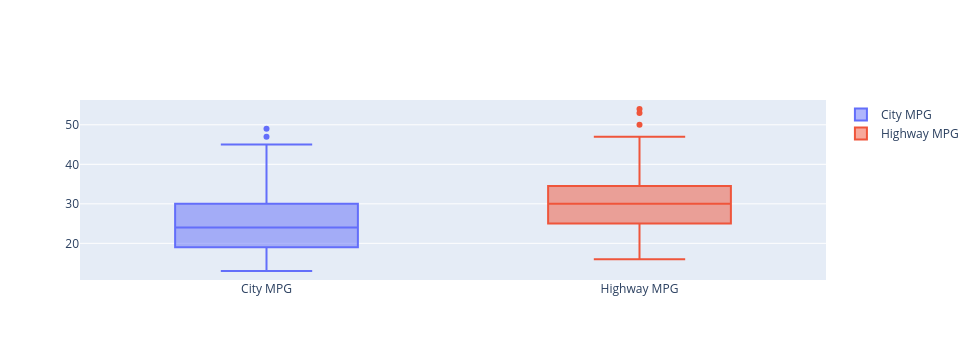

In [38]:
offline.iplot(data)

#### We can customize box plots

In [39]:
## Show mean line along with median line
## And also show points
box0 = go.Box(
    y=autodata['city-mpg'],
    name='City MPG',
    boxmean=True,
    boxpoints='all'
)

In [40]:
## Show standard deviation with mean line
box1 = go.Box(
    y=autodata['highway-mpg'],
    name='Highway MPG',
    boxmean='sd'
)

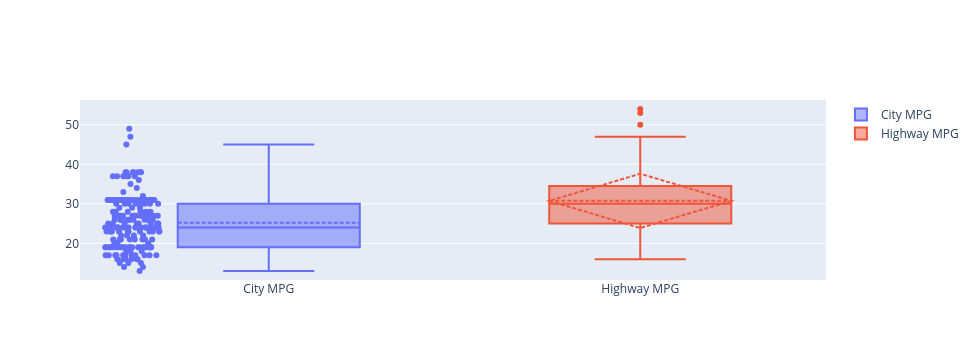

In [41]:
data = [box0, box1]
offline.iplot(data)

## Scatter

#### Lets prepare some dummy data for showing scatter plot

In [43]:
xdata = np.linspace(0, 1, 50)
ydata1 = np.random.randn(50)
ydata2 = np.random.rand(50) + 5
ydata3 = np.random.rand(50) - 5

#### Lets plot this on scatter plot

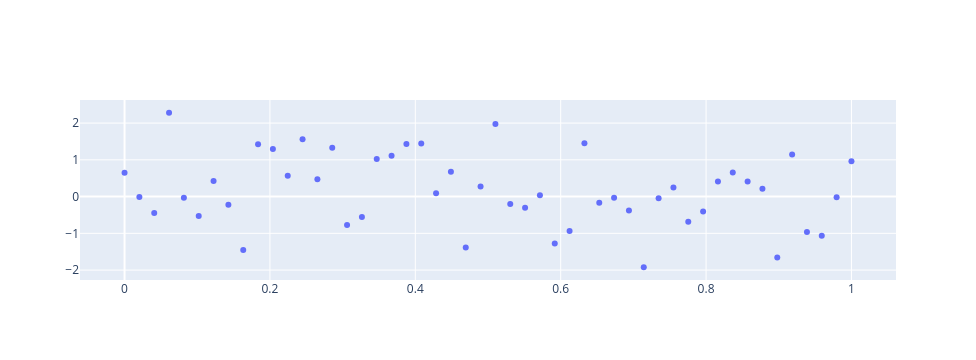

In [46]:
trace0 = go.Scatter(
    x = xdata,
    y = ydata1,
    mode='markers'
)
data = [trace0]
offline.iplot(data)

### Modes is a way to show data in Scatter function
last time we used same scatter method t plot line since 'line' mode is default

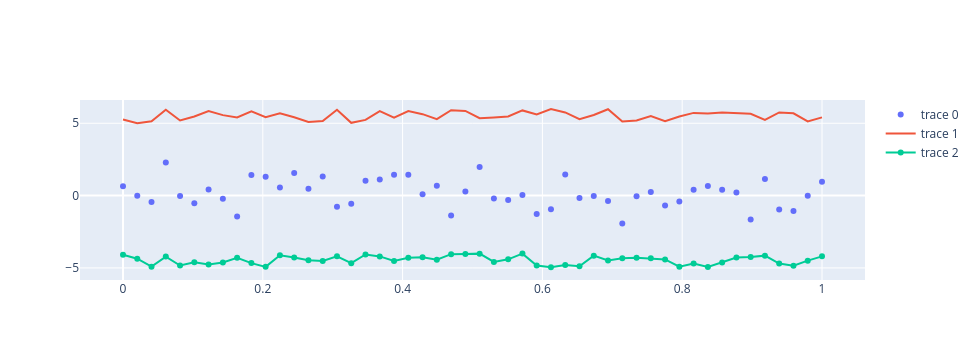

In [47]:
trace0 = go.Scatter(
    x = xdata,
    y = ydata1,
    mode='markers'
)

trace1 = go.Scatter(
    x = xdata,
    y = ydata2,
    mode='lines'
)

trace2 = go.Scatter(
    x = xdata,
    y = ydata3,
    mode='lines+markers'
)

data = [trace0, trace1, trace2]
offline.iplot(data)

#### Lets plot it on some actual data

In [48]:
honey = pd.read_csv('datasets/honeyproduction.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


#### In Scatter plot we can use some marker color to show another dimension

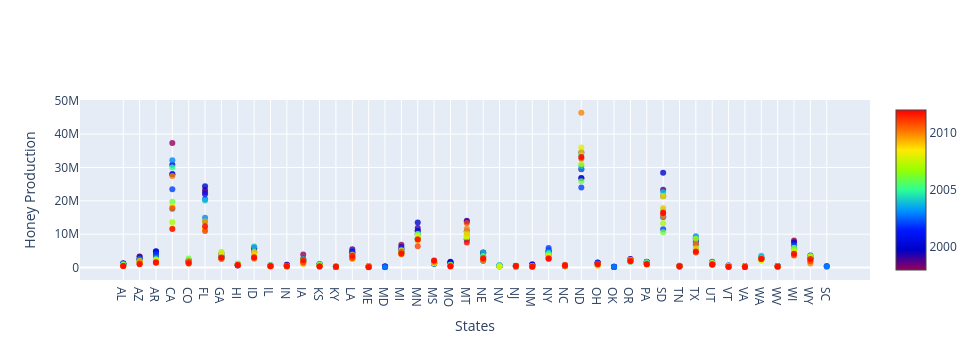

In [54]:
trace = go.Scatter(
    x = honey.state,
    y = honey.totalprod,
    mode = 'markers',
    marker = go.scatter.Marker(
        color = honey.year,
        colorscale = 'Rainbow',
        showscale = True,
        opacity=0.8
    )
)

data = [trace]

layout = go.Layout(
    xaxis=go.layout.XAxis(title='States'),
    yaxis=go.layout.YAxis(title='Honey Production')
)

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)